In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.utils import resample # downsample the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.decomposition import PCA 

In [15]:
df = pd.read_csv("credit_card.csv", header=1)

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
df = df.rename({"default payment next month": "default"}, axis="columns").drop("ID", axis=1)

In [17]:
df.head(20)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [18]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

In [20]:
# check uniquness of columns
print(df["SEX"].unique())
print(df["EDUCATION"].unique())
print(df["MARRIAGE"].unique())

[2 1]
[2 1 3 5 4 6 0]
[1 2 3 0]


In [25]:
len(df.loc[(df["EDUCATION"] == 0) | (df["MARRIAGE"] == 0)])

68

In [27]:
df_no_missing = df.loc[(df["EDUCATION"] != 0) & (df["MARRIAGE"] != 0)]
len(df_no_missing)

29932

In [28]:
# split default and no default data
df_default = df_no_missing[df_no_missing["default"] == 1]
df_nodefault = df_no_missing[df_no_missing["default"] == 0]

In [30]:
# downsample data

df_default_ds = resample(df_default, replace=False, n_samples=1000)
df_nodefault_ds = resample(df_nodefault, replace=False, n_samples=1000)

len(df_default_ds) , len(df_nodefault_ds)

(1000, 1000)

In [31]:
df_total_ds = pd.concat([df_nodefault_ds, df_default_ds])


In [35]:
x = df_total_ds.drop(labels="default", axis=1)
y = df_total_ds["default"].copy()

In [37]:
pd.get_dummies(x, columns=["MARRIAGE"], dtype=int).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
3984,450000,2,2,44,0,0,0,0,0,0,...,8490,8000,5000,7000,3000,2000,1626,1,0,0
1335,60000,2,3,32,0,0,0,0,0,0,...,29151,1500,1500,1003,1500,1500,1044,0,1,0
21329,170000,1,2,64,-1,-1,-1,-1,0,-1,...,685,1788,9,3897,0,685,0,1,0,0
11651,130000,2,1,30,1,-2,-2,-2,-2,-2,...,-1070,0,0,0,0,0,0,0,1,0
18956,130000,2,5,39,-1,-1,-1,-1,-1,-1,...,678,264,264,264,0,942,0,0,1,0


In [42]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [43]:
# convert categorical columns in one-hot encoding. 

x_encoded = pd.get_dummies(x, columns=["SEX", 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], dtype=int)
x_encoded.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-2',
       'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6',
       'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3',
       'PAY_3_4', 'PAY_3_5', 'PAY_3_7', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0',
       'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_7',
       'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4',
       'PAY_5_5', 'PAY_5_7', 'PAY_6_-2', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2',
       'PAY_6_3', 'PAY_6_4', 'PAY_6_6'

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y)
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)

In [46]:
svm = SVC()
svm.fit(x_train_scaled, y_train)

SVC()

In [47]:
predictions = svm.predict(x_test_scaled)
cm = confusion_matrix(y_test, predictions, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)

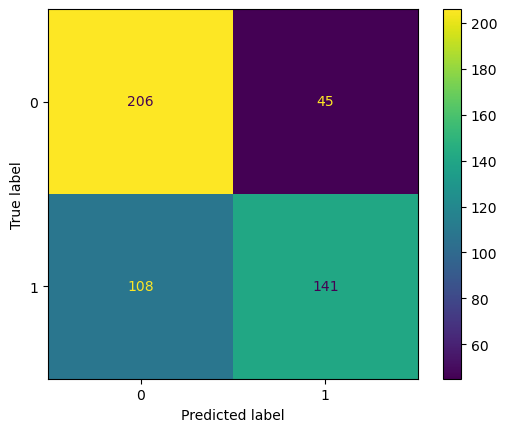

In [49]:
disp.plot()

In [51]:
# optimize with cross-validation

param_grid = [{
    "C": [0.5, 1, 10, 100], 
    "gamma" : ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf"]
}]

In [52]:
optimal_params = GridSearchCV(
    SVC(), 
    param_grid, 
    cv=5, 
    scoring="accuracy", 
    verbose=0
)

optimal_params.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [54]:
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [55]:
svm2 = SVC(C=100, gamma=0.001)
svm2.fit(x_train_scaled, y_train)

SVC(C=100, gamma=0.001)

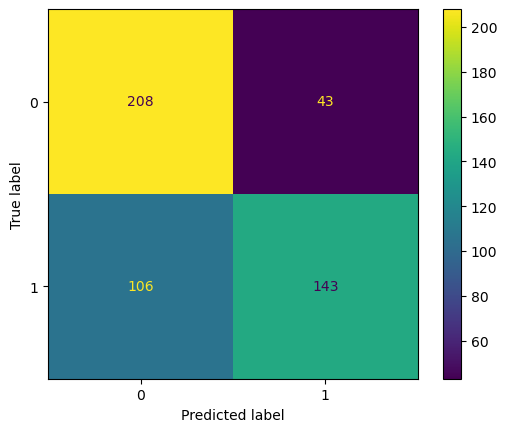

In [60]:
predictions = svm2.predict(x_test_scaled)
cm = confusion_matrix(y_test, predictions, labels=svm2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm2.classes_)
disp.plot()

In [66]:
# collapse into 2 dimensions using PCA()

pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)\

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

len(per_var)

78

<BarContainer object of 78 artists>

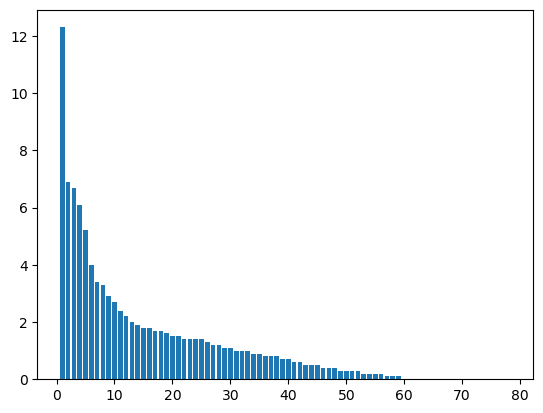

In [67]:
plt.bar(x=range(1, len(per_var)+1), height=per_var)